In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Đọc tập dữ liệu từ file CSV (giả định rằng bạn có file rice_dataset.csv)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
# Đọc tập dữ liệu từ file CSV (giả định rằng bạn có file rice_dataset.csv)
df = pd.read_excel('./xoa-2cot-rice.xlsx', engine='openpyxl')

In [13]:
# Hiển thị vài dòng đầu tiên của tập dữ liệu
print(df.head())

   Class   Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity    Extent
0      0  15231  525.578979         229.749878          85.093788      0.928882  0.572896
1      0  14656  494.311005         206.020065          91.730972      0.895405  0.615436
2      0  14634  501.122009         214.106781          87.768288      0.912118  0.693259
3      0  13176  458.342987         193.337387          87.448395      0.891861  0.640669
4      0  14688  507.166992         211.743378          89.312454      0.906691  0.646024


In [14]:
# Thống kê cơ bản về các cột số
print(df.describe())

             Class          Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity       Extent
count  3802.000000   3802.000000  3802.000000        3802.000000        3802.000000   3802.000000  3802.000000
mean      0.573119  12664.441347   454.175170         188.744367          86.306830      0.886851     0.661874
std       0.494690   1731.617416    35.584764          17.437913           5.731672      0.020818     0.077168
min       0.000000   7551.000000   359.100006         145.264465          59.532406      0.777233     0.497413
25%       0.000000  11366.000000   426.074989         174.351917          82.723135      0.872370     0.598862
50%       1.000000  12418.500000   448.839005         185.755844          86.424641      0.889010     0.645361
75%       1.000000  13945.000000   483.651497         203.507004          90.132666      0.902567     0.726259
max       1.000000  18913.000000   548.445984         239.010498         107.542450      0.948007     0.861050


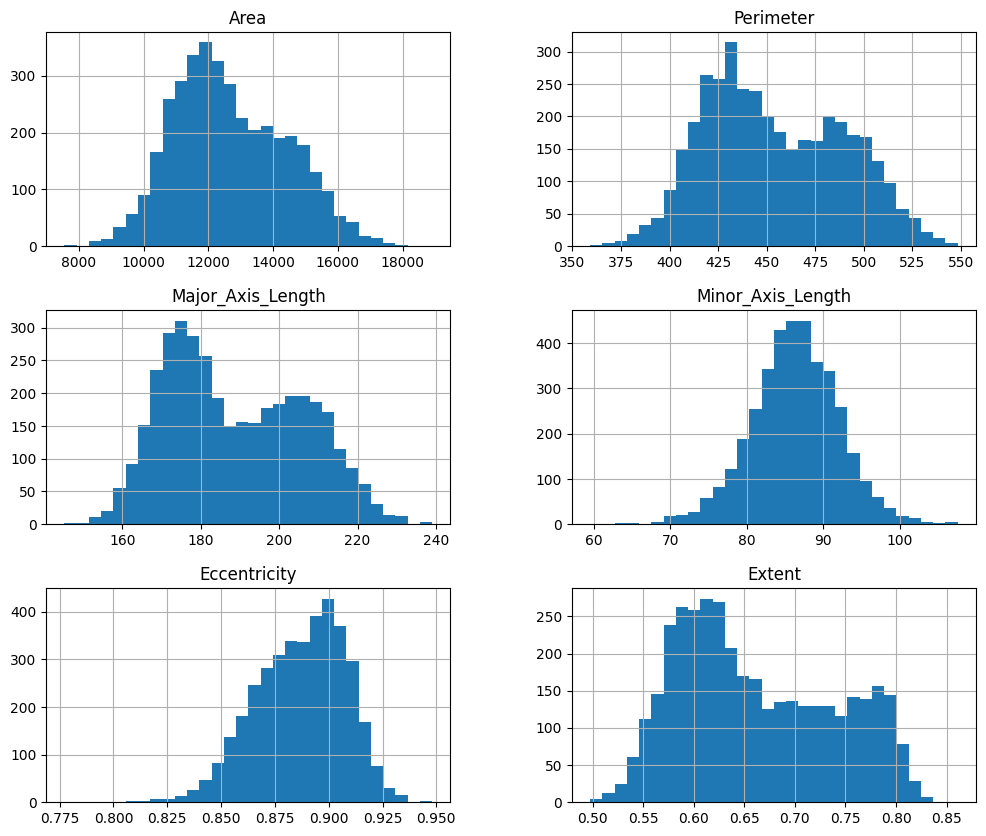

In [10]:
# Vẽ biểu đồ phân phối cho các thuộc tính số
df1 = df.drop(columns='Class')
df1.hist(bins=30, figsize=(12, 10))
plt.show()

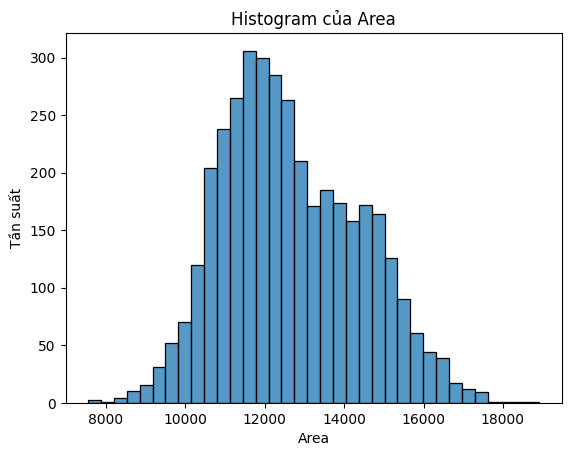

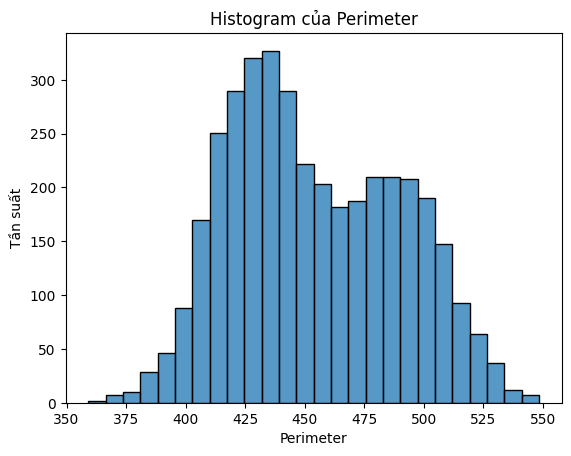

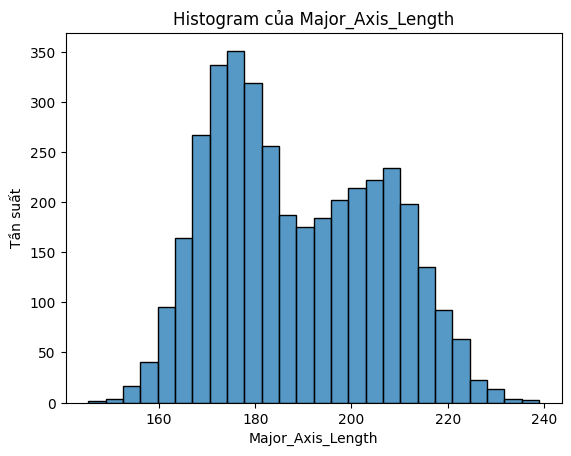

In [28]:
# Trực quan cột Area, Perimeter và Major_Axis_Length
for col in ['Area', 'Perimeter', 'Major_Axis_Length']:
    sns.histplot(df[col], kde=False, color='#1f77b4')
    plt.title(f'Histogram của {col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất')
    plt.show()

c:\Python 3.10.5\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 36.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python 3.10.5\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 48.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python 3.10.5\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 58.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python 3.10.5\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 68.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


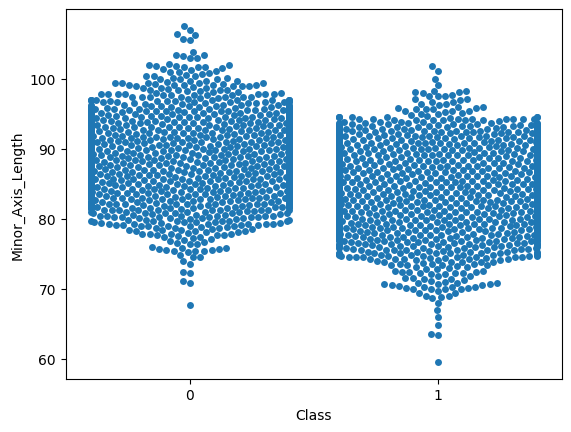

In [32]:
# Trực quan cột Minor_Axis_Length
sns.swarmplot(x='Class', y='Minor_Axis_Length', data=df)

# Hiển thị biểu đồ
plt.show()

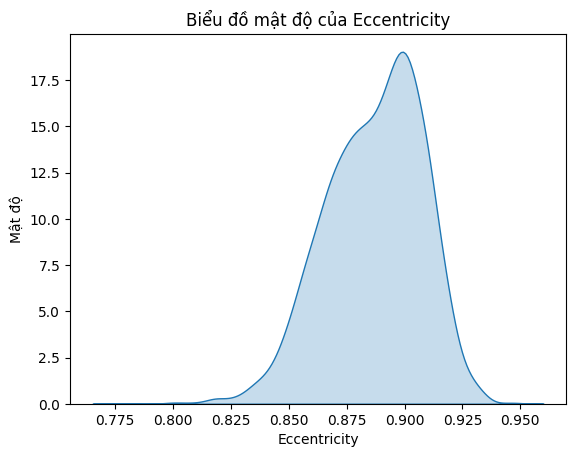

In [22]:
# Trực quan cột Eccentricity
sns.kdeplot(df['Eccentricity'], fill=True, color='#1f77b4')

plt.title('Biểu đồ mật độ của Eccentricity')
plt.xlabel('Eccentricity')
plt.ylabel('Mật độ')
plt.show()

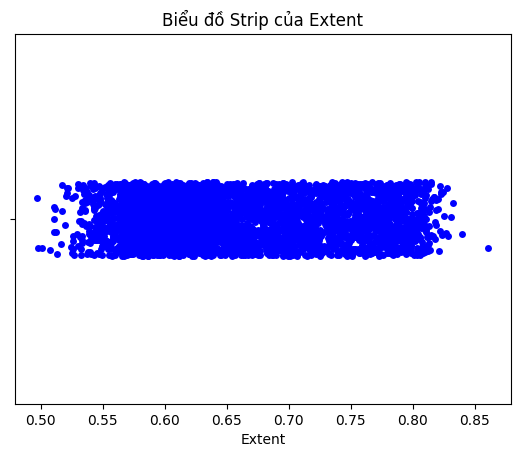

In [24]:
# Trực quan cột Extent
sns.stripplot(x=df['Extent'], color='blue')

# Hiển thị biểu đồ
plt.title('Biểu đồ Strip của Extent')
plt.xlabel('Extent')
plt.show()

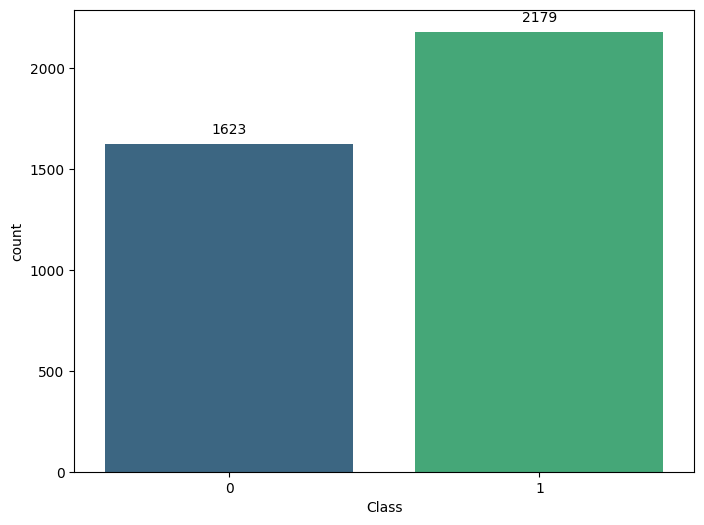

In [25]:
# Biểu đồ phân phối nhãn

plt.figure(figsize=(8, 6))
sns_plot = sns.countplot(x='Class', data=df,
                         hue='Class', palette='viridis', legend=False)

# Thêm số lượng lên trên mỗi cột
for p in sns_plot.patches:
    sns_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 10),
                      textcoords='offset points')

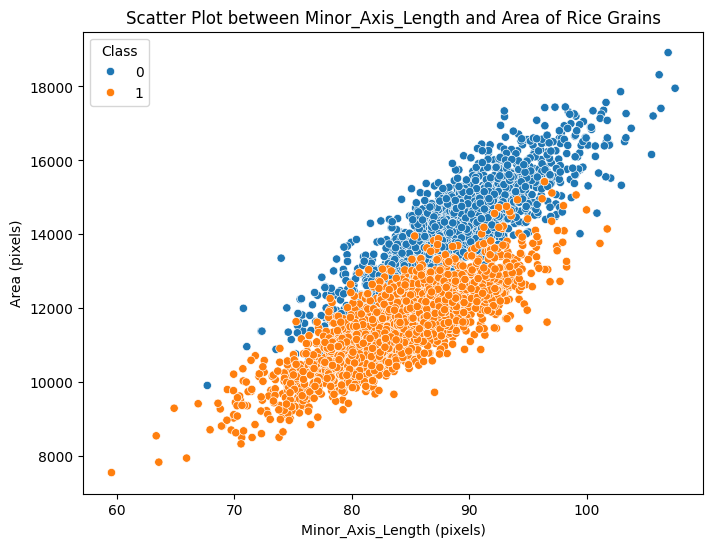

In [5]:
# Tương quan giữa Minor_Axis_Length và Area
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Minor_Axis_Length', y='Area', hue='Class', data=df)
plt.title('Scatter Plot between Minor_Axis_Length and Area of Rice Grains')
plt.xlabel('Minor_Axis_Length (pixels)')
plt.ylabel('Area (pixels)')
plt.show()

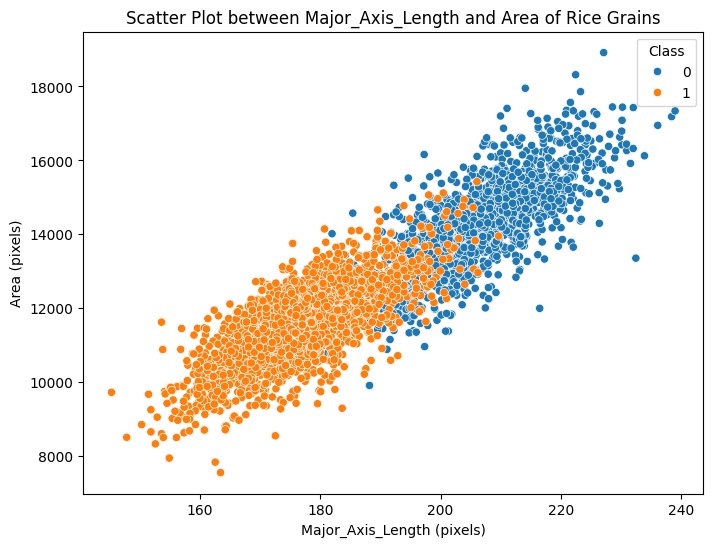

In [6]:
# Tương quan giữa Major_Axis_Length và Area
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Major_Axis_Length', y='Area', hue='Class', data=df)
plt.title('Scatter Plot between Major_Axis_Length and Area of Rice Grains')
plt.xlabel('Major_Axis_Length (pixels)')
plt.ylabel('Area (pixels)')
plt.show()

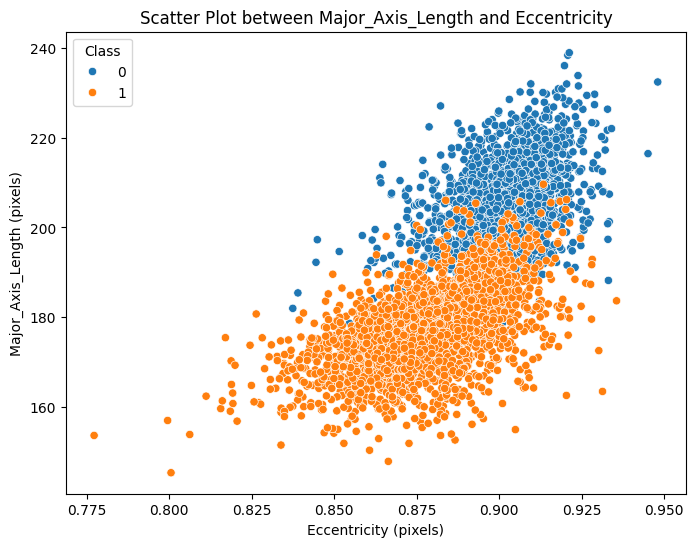

In [27]:
# Tương quan giữa Eccentricity và Major_Axis_Length
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Eccentricity',
                y='Major_Axis_Length', hue='Class', data=df)
plt.title('Scatter Plot between Major_Axis_Length and Eccentricity')
plt.xlabel('Eccentricity (pixels)')
plt.ylabel('Major_Axis_Length (pixels)')
plt.show()